# Agarwal (1970) model
 
This notebook demonstrates how to use **OpenHyTest** for the interpretation of an interference pumping test using Agarwal (1970) model (skin + well capacity).

Copyright 1998-2020 - Philippe Renard, Nathan Dutler & Bernard Brixel



First, we append the openhytest folder to the system path using the 'sys' library and import than the 'openhytest' library as ht. In addition, we import the 'matplotlib.pyplot' library for plotting and the 'pandas' library for data management. 


In [1]:
%matplotlib inline
import sys
sys.path.append("../")
import openhytest as ht
import pandas as pd
import numpy as np

## Load the data

The data set for this example has been provided by: 
HALL P., CHEN J., 1996. Water well and aquifer test analysis. Water Resources Publications, LLC, 412 pp.
The test data are published on page 171-174. and interpreted with the Papadopulos-Cooper model with 2 differents storativities.

rw=0.6096              Radius of the well in m

rc=0.6096              Radius of the casing in m

r=3.048                Radial distance in m

Q=0.0050464            Pumping rate m3/s

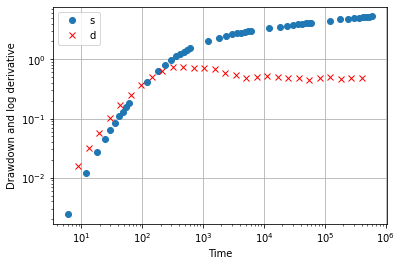

In [2]:
data = pd.read_csv('../data/pca_ds1.txt', header=None,sep=" ",names=['t','s'], dtype={'t': 'float64', 's': 'float64'})
test = ht.preprocessing(data)
test.diagnostic()

## Model 

1) We initialize the Agarwal model with 6.309e-3 m^3/s, distance to the pumping well of 3.048 m and thickness of the aquitard 6.096 m and show first the typecurve.

2) Then a first model parameter guess is done and showing the results with the trial function.

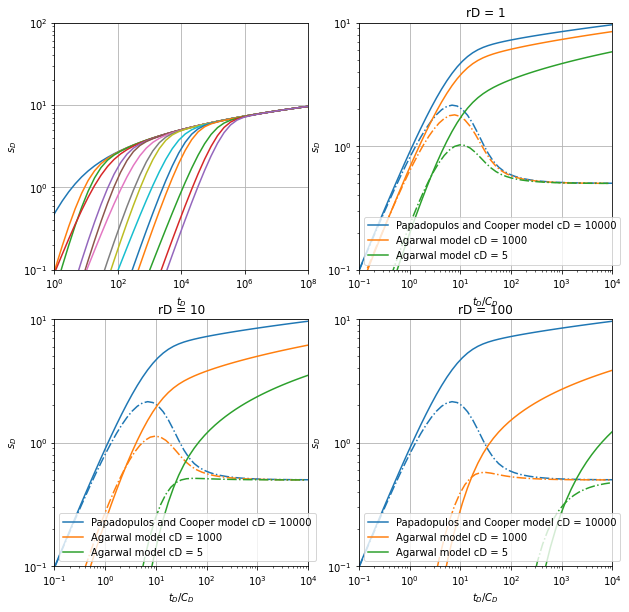

In [3]:
test= ht.Agarwal()
test.plot_typecurve()

The model parameter guess is important to get reliable results, as in total 3 parameters needs to be fitted.

In [4]:
model = ht.Agarwal(Q=5.0464e-3, r=3.048, rc=0.6096, rw=0.6096, df=data)
p0 = model.guess_params()
print("estimated parameter vector:",p0)

estimated parameter vector: [1.1213349759539466, 12.070385867781901, 1.0]


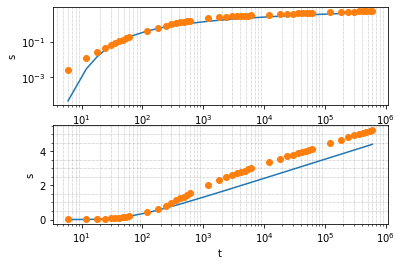

T =  0.0008246167048997646 m2/s
S =  0.002406146430468435 -
Cd =  207.8011519451286 -


In [5]:
model.inversion_option='dehoog'
model.trial()

Let use proceed with the automatic fit and directly report the results of the interpretation.

`ftol` termination condition is satisfied.
Function evaluations 12, initial cost 9.6944e+00, final cost 1.5986e-02, first-order optimality 1.94e-05.


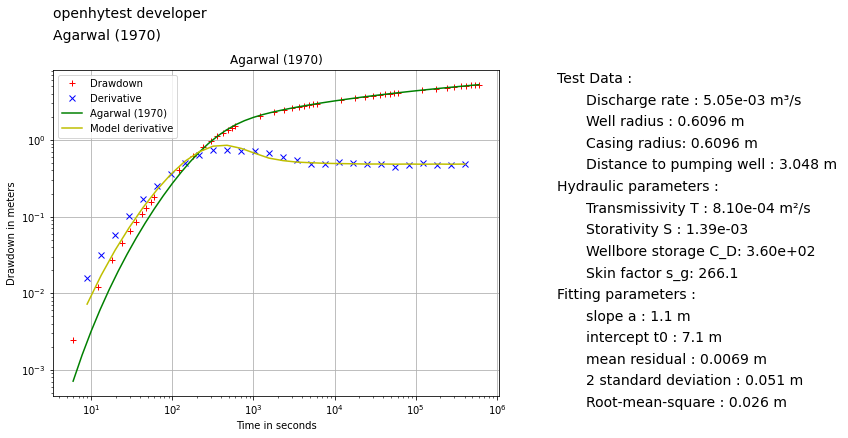

In [6]:
model.inversion_option='dehoog'
model.rpt(fitmethod='trf')

For comparison, the results found by Hall and Chen using the Papadopulos-Cooper (1967) model using two different storativities is :

alpha = 0.002   which is equivalent to Cd = 1000

T    = 7.97e-04 m2/s

S1   = 3.49e-03 

S2   = 2.00e-03
